In [1]:
from sklearn import datasets
#use the datasets already available in the sklearn library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load and preprocess the datasets

In [2]:
# Load the datasets

iris = datasets.load_iris()
#print(type(iris))

X = iris.data[:,[2,3]]
y = iris.target
#X,y

In [3]:
# Split data into training and testing sets

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [4]:
# Standardize th features
'''
Note:we apply the same mean/std parameters (from training data) to standardize both X_train and X_test data
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #initialize an StandardScaler object and assign it to sc
sc.fit(X_train) # by 'fit' method, we estimate the mean and std of the X_training data
X_train_std = sc.transform(X_train) # standardize the traning data with the above parameters
X_test_std = sc.transform(X_test) # same as above


 ## Learning Algorithm
 
 ### 1. Perceptron Model

In [5]:
# Predict with Perceptron model
'''
Remember: Perceptron model never works on non-linear separable datasets. 
'''

from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

# evaluate the algorithm manually
print('Missclassified samples: %d' % (y_test!=y_pred).sum())

from sklearn.metrics import accuracy_score
print('Accuracy score: %.3f' % accuracy_score(y_pred,y_test))
# %.3f means float number, 保留小数点后3位


Missclassified samples: 4
Accuracy score: 0.911


### 2. Logistic Regression model

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000, random_state = 0) # C is the inverse of regulation strength, like that in SVM
lr.fit(X_train_std, y_train)
lr.predict_proba(X_test_std[0:5,:]) 
# following shows the probability of the first 5 samples being classified into different labels


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01],
       [  6.08753106e-04,   9.99285569e-01,   1.05678028e-04],
       [  8.16962653e-01,   1.83037347e-01,   6.48299403e-14],
       [  1.60866539e-11,   4.14084479e-01,   5.85915521e-01],
       [  8.00231776e-01,   1.99768224e-01,   1.07576258e-13]])

In [7]:
'''
The coefficients is an array with shape ( n_class, n_features)
lr.coef_[1] means the coef of the "class 2 vs. all classifier". 
We are using the OvR technique for multiclass classification
'''
lr.coef_


array([[-7.34015187, -6.64685581],
       [ 2.54373335, -2.3421979 ],
       [ 9.46617627,  6.44380858]])

In [8]:
# Let's look at how C tunes the weights of the parameters

'''
Overfitting: it is caused by having too many parameters that the model is too complex and has a high variance and very 
             sensitive to noise
Underfitting: the model is not complex enough to capture the pattern in the training data and suffer from high bias.
'''

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # store the weights of class 2 vs. all
    params.append(10**c)
    
weights = np.array(weights)
weights


array([[  6.55979672e-05,   3.27209902e-05],
       [  6.53690140e-04,   3.24948619e-04],
       [  6.31936684e-03,   3.03439293e-03],
       [  4.88199280e-02,   1.62092216e-02],
       [  2.38824476e-01,  -6.64831864e-02],
       [  1.06011115e+00,  -8.41544819e-01],
       [  2.19190886e+00,  -1.98265142e+00],
       [  2.50582212e+00,  -2.30336729e+00],
       [  2.54373335e+00,  -2.34219790e+00],
       [  2.54760621e+00,  -2.34616582e+00]])

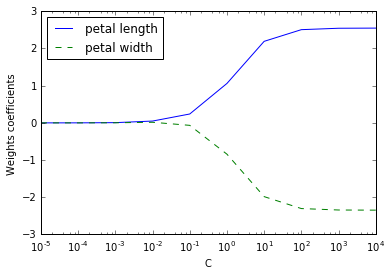

Logistic Regression accuracy is: 0.98


In [9]:
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], label = 'petal width', linestyle = '--')
plt.ylabel('Weights coefficients')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()


y_pred = lr.predict(X_test_std)
print('Logistic Regression accuracy is: %.2f' %  accuracy_score(y_test,y_pred))

##### The following codes show how L1 regulation changes the weight parameters. Basically, the smaller C, the heavier the regulation and more parameters are set to zeros.

In [21]:
lr = LogisticRegression(penalty='l1', C = 10, random_state = 0) 
# C is the inverse of regulation strength, like that in SVM
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

lr.coef_

Training accuracy: 0.961904761905
Test accuracy: 0.977777777778


array([[-5.46025075, -3.32138819],
       [ 2.37201919, -2.16638756],
       [ 6.85998567,  5.72693775]])

In [23]:
lr = LogisticRegression(penalty='l1', C = 0.1, random_state = 0) 
# C is the inverse of regulation strength, like that in SVM
lr.fit(X_train_std, y_train)

lr.coef_

array([[-1.8444603 ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.50470925]])

### 3. Support Vector Machine 

In [81]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C =1, random_state = 0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('SVM accuracy is: %.2f' %  accuracy_score(y_test,y_pred))

SVM accuracy is: 0.98


#### Logistic regression and SVM show very similar results. LR is more prone to outliers, but easier to implemented and update. Thus LR is more attractive when working with streaming data.

In [84]:
svm = SVC(kernel = 'rbf', C =1, random_state = 0,gamma = 10)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('SVM accuracy is: %.2f' %  accuracy_score(y_test,y_pred))

SVM accuracy is: 1.00


### 4. Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std)
print('Tree accuracy is: %.2f' %  accuracy_score(y_test,y_pred))

Tree accuracy is: 0.98


In [89]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file ='tree.dot', feature_names = ['petal length','pedal_width'])
# this step export the tree plot as a dot file.


### 5. Random Forest

Forest accuracy is: 0.98
Feature importance: [ 0.48560379  0.51439621]
0.977777777778


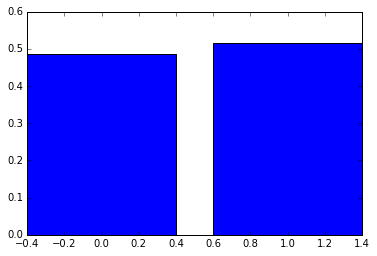

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', random_state =1, n_jobs = 2, n_estimators = 100)
forest.fit(X_train_std,y_train)
y_pred = forest.predict(X_test_std)
print('Forest accuracy is: %.2f' %  accuracy_score(y_test,y_pred))

importance = forest.feature_importances_
print('Feature importance:', importance)
plt.bar(range(X_train.shape[1]), importance, align = 'center')
print(forest.score(X_test_std,y_test))

### 6. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()